In [20]:
#Importamos librerias necesarias
import numpy as np
import scipy.linalg as spla
import matplotlib.pyplot as plt

# Mínimos cuadrados usando QR

Al resolver un problema de mínimos cuadrados con la forma tradicional(Ecuaciones normales), notamos que es común encontrarnos con sistemas mal condicionados, esto se evita al utilizar la factirización QR, ya que no utilizamos $A^*A$ que es lo que suele generar complicaciones.

Para resolver utilizando la factorización QR, debemos realizar el siguiente procedimiento:

1. Obtener $A = \hat{Q}\hat{R}$, utilizando el método reducido.
2. Resolver el sistema $\hat{R}A = \hat{Q}^*b$, esto se puede realizar con backward-substitution.

In [21]:
def QR(A):
    n, m = A.shape[::-1]
    rs = np.zeros((n,n))
    qs = np.zeros((m,n))
    for j in range(n):
        y = A[:, j]
        for i in range(0, j):
            rs[i, j] = qs[:,i]@y
            y = y-rs[i, j]*qs[:,i]
        rs[j, j] = np.linalg.norm(y)
        qs[:,j] = y/rs[j,j]
    return qs, rs

In [22]:
def lstsq_QR(A, b):
    Q, R = QR(A)
    x = spla.solve_triangular(R, np.dot(Q.T, b))
    return x

Probemos un ejemplo, dados los siguientes puntos de la forma $(t,y)=(1,2)$, $(-1,1)$ y $(1,3)$.

Veamos que modelo es conveniente usar:

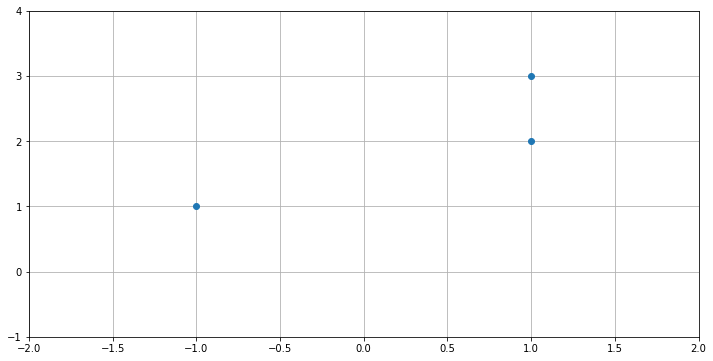

In [23]:
t = np.array([1,-1,1])
y = np.array([2,1,3])

plt.figure(figsize=(12,6))
plt.plot(t, y, 'o')
plt.xlim(right=2, left=-2)
plt.ylim(top=4, bottom=-1)
plt.grid(True)
plt.show()

Podemos apreciar que un modelo lineal es una buena aproximación al problema, entonces diremos que $y = c_1 + c_2t$.

Reemplazando los puntos:

\begin{align*}
    c_1 + 2c_2 &= 1\\
    c_1 - c_2 &= 1\\
    c_1 + 3c_2 &= 1\\
\end{align*}

De donde obtenemos el siguiente sistema de ecuaciones sobre-condicionado:

$$
    \begin{bmatrix}
        1 & 2\\
        1 & -1\\
        1 & 3
    \end{bmatrix}\begin{bmatrix}
        c_1\\
        c_2
    \end{bmatrix}=\begin{bmatrix}
        1 \\
        1 \\
        1 
    \end{bmatrix}
$$

Resolvemos con el método de minimos cuadrados.

In [24]:
A = np.array([
    [1, 1],
    [1,-1],
    [1, 1]
])
b = np.array([2,1,3])
x = lstsq_QR(A, b)
x

array([1.75, 0.75])

Obtenemos que la aproximación es $y=1.75+0.75t$.

Visualizaremos la aproximación.

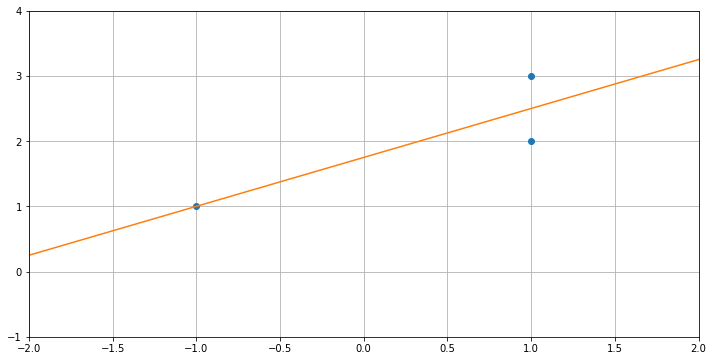

In [25]:
y_m = lambda t: 1.75+0.75*t

ts = np.linspace(-2,2,10)
ys = y_m(ts)

plt.figure(figsize=(12,6))
plt.plot(t, y, 'o')
plt.plot(ts, ys)
plt.xlim(right=2, left=-2)
plt.ylim(top=4, bottom=-1)
plt.grid(True)
plt.show()

Finalmente calcularemos el error RMSE, el cual viene dado por:

$$
    RMSE = \sqrt{SE/m},
$$
donde $SE = r_1^2 + \dots + r_m^2 = ||r||_2^2$

y $r$ es el vector residuo, que tiene la forma:

$$
    r = b-A\overline{x}
$$

In [26]:
def error(A,b,x):
    r = b-A@x

    RMSE = np.linalg.norm(r, ord=2)/np.sqrt(r.shape[-1])
    return RMSE
error(A,b,x)

0.4082482904638631

Otro ejemplo, encontrar la mejor curva para los puntos $(x,y) = (-1,1)$, $(0,0)$, $(1,0)$ y $(2,-2)$

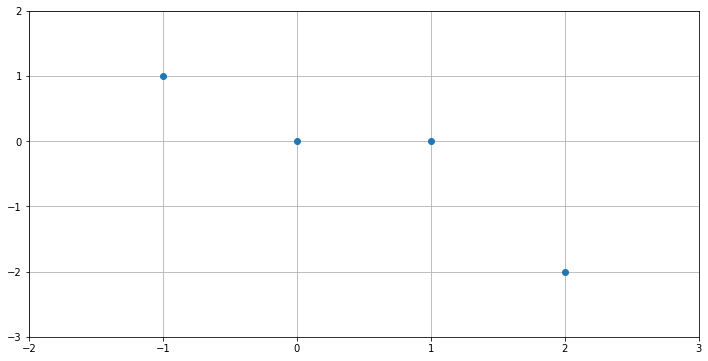

In [27]:
x = np.array([-1,0,1,2])
y = np.array([1,0,0,-2])

plt.figure(figsize=(12,6))
plt.plot(x,y, 'o')
plt.xlim(left=-2, right=3)
plt.ylim(bottom=-3, top=2)
plt.grid(True)
plt.show()

Se observa que la curva que calza puede ser lineal o parabolica, desarrollaremos ambos casos y compararemos su RMSE.

### Lineal
Sea $y_{lineal} = c_1 + c_2t$.

Reemplazando los puntos:

\begin{align*}
    c_1 - c_2 &= 1\\
    c_1 &= 0\\
    c_1 + 1c_2 &= 0\\
    c_1 + 2c_2 &= -2\\
\end{align*}

De donde obtenemos el siguiente sistema de ecuaciones sobre-condicionado:

$$
    \begin{bmatrix}
        1 & -1\\
        1 &  0\\
        1 &  1\\
        1 & 2
    \end{bmatrix}\begin{bmatrix}
        c_1\\
        c_2
    \end{bmatrix}=\begin{bmatrix}
        1 \\
        0 \\
        0 \\
        -2
    \end{bmatrix}
$$


### Lineal
Sea $y_{par} = c_1 + c_2t + c_3t^2$.

Reemplazando los puntos:

\begin{align*}
    c_1 - c_2 + c_3 &= 1\\
    c_1 &= 0\\
    c_1 + c_2 + c_3 &= 0\\
    c_1 + 2c_2 + 4c_2&= -2\\
\end{align*}

De donde obtenemos el siguiente sistema de ecuaciones sobre-condicionado:

$$
    \begin{bmatrix}
        1 & -1& 1\\
        1 & 0 & 0\\
        1 & 1 & 1\\
        1 & 2 & 4
    \end{bmatrix}\begin{bmatrix}
        c_1\\
        c_2\\
        c_3
    \end{bmatrix}=\begin{bmatrix}
        1 \\
        0 \\
        0 \\
        -2
    \end{bmatrix}
$$

#### Es importante notar que la matrix b siempre sera la misma para un mismo conjunto de puntos.

In [28]:
b = np.array([1,0,0,-2])

A_l = np.array([
    [1,-1],
    [1,0],
    [1,1],
    [1,2]
])

A_p = np.array([
    [1,-1,1],
    [1,0,0],
    [1,1,1],
    [1,2,4]
])

x_l = lstsq_QR(A_l, b)
x_p = lstsq_QR(A_p, b)
err_l = error(A_l, b, x_l)
err_p = error(A_p, b, x_p)
print("x_l:", x_l, "Error_l: ", err_l, '\nx_p:', x_p, 'Error_p:', err_p)

x_l: [ 0.2 -0.9] Error_l:  0.4183300132670378 
x_p: [ 0.45 -0.65 -0.25] Error_p: 0.33541019662496846


Podemos concluir que la parabola es una mejor aproximación para el conjunto de puntos, ya que posee un RMSE menor.

Visualizemos ambas curvas y el conjunto de puntos.

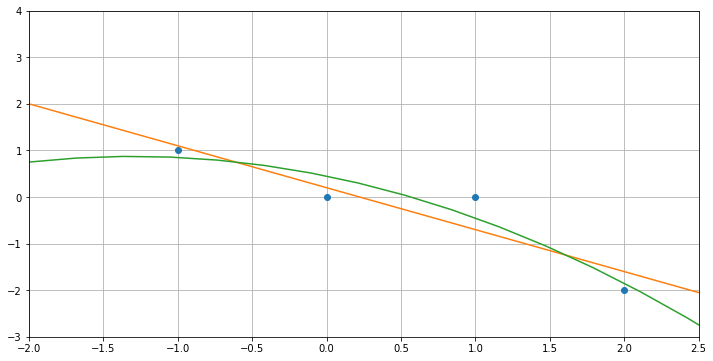

In [29]:
y_l = lambda x: 0.2-0.9*x
y_p = lambda x: 0.45-0.65*x-0.25*x**2

xs = np.linspace(-2,4,20)
ys_l = y_l(xs)
ys_p = y_p(xs)

plt.figure(figsize=(12,6))
plt.plot(x, y, 'o')
plt.plot(xs, ys_l)
plt.plot(xs, ys_p)
plt.xlim(right=2.5, left=-2)
plt.ylim(top=4, bottom=-3)
plt.grid(True)
plt.show()

In [30]:
import numpy as np
import scipy
import scipy.linalg
asd = np.array([[1,-4,1],[2,3,3],[2,2,4]])
Q, R = scipy.linalg.qr(asd)
np.linalg.norm(Q[0])/np.linalg.norm(Q[1]), np.linalg.norm(Q[2])

(0.9999999999999999, 1.0)

In [39]:
asd = np.array([1,2,3,4,5,6,7,8])
asd[1:3]

array([2, 3])